## K-Nearest Neighbors
This notebook will start by covering what K-Nearest Neighbors (KNN) is, how it works, and how to use KNN in Python. Throughout this notebook we will also go over what pipelines are and how to use them. 

### What is K-Nearest Neighbors

K-nearest neighbors is a model that uses the "K" most similar observations in order to make a prediction.

In [1]:
from IPython.display import Video

# Couldn't identify the source of this video. 
Video("images/KNN-Classification.mp4")

Here is roughly how K-Nearest Neighbors works:
1. User specifies value for K. In this example above, we choose K=5 neighbors around black point.
2. Search for the K observations in the data that are nearest to the measurements of an unknown sample
    * Euclidian distance is often used as the distance metric
3. Use the most popular target value from the K nearest neighbors as the predicted target value. In the example above, out of 5 nearest neighbors of black point, 2 are brown and 3 are green. Since we have a majority of green points around this black point we assign green label to it.

<b>Advantages of KNN</b>

Easier to understand and explain than other machine learning algorithms

Can be used for classification or regression

<b>Disadvantages of KNN</b>

It must store all of the training data. 

Its prediction phase can be slow when n is large

Typically worse performance than other supervised learning methods

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import metrics

### Load Data
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [3]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Arrange Data into Features Matrix and Target Vector

For demonstrational purposes, we are going take two features 

In [4]:
X = df.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
#X = df.loc[:, df.columns != 'target']

In [5]:
X.shape

(150, 2)

In [6]:
y = df.loc[:, 'target'].values

In [7]:
y.shape

(150,)

### Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    test_size = .2)

### KNN in `scikit-learn`

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [9]:
from sklearn.neighbors import KNeighborsClassifier

<b>Step 2:</b> Make an instance of the Model

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
print(knn)

KNeighborsClassifier()


<b>Step 3:</b> Train the model on the data, storing the information learned from the data. Model is learning the relationship between features and labels

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

<b>Step 4:</b> Predict the labels of new data

Uses the information the model learned during the model training process

In [13]:
predictions = knn.predict(X_test)

In [14]:
predictions

array([1, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0])

In [15]:
# calculate classification accuracy
score = knn.score(X_test, y_test)

In [16]:
score

0.6666666666666666

### Visualizing Data

Text(0.5, 1.0, '3-Class classification (k = 5)')

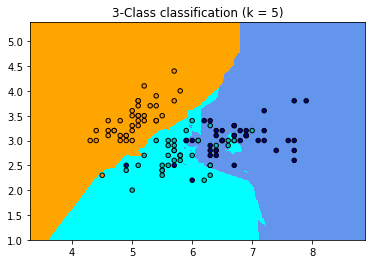

In [17]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
h = .02  # step size in the mesh


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train.loc[:, 'sepal length (cm)'].values.min() - 1, X_train.loc[:, 'sepal length (cm)'].values.max() + 1
y_min, y_max = X_train.loc[:, 'sepal width (cm)'].values.min() - 1, X_train.loc[:, 'sepal width (cm)'].values.max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='nearest')

# Plot also the training points
plt.scatter(X_train.loc[:, 'sepal length (cm)'].values,
            X_train.loc[:, 'sepal width (cm)'].values,
            c=y_train,
            cmap=cmap_bold,
            edgecolor='k',
            s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = 5)")

In [ ]:
xx.shape

### Visualizing Data (YouTube Thumbnail)

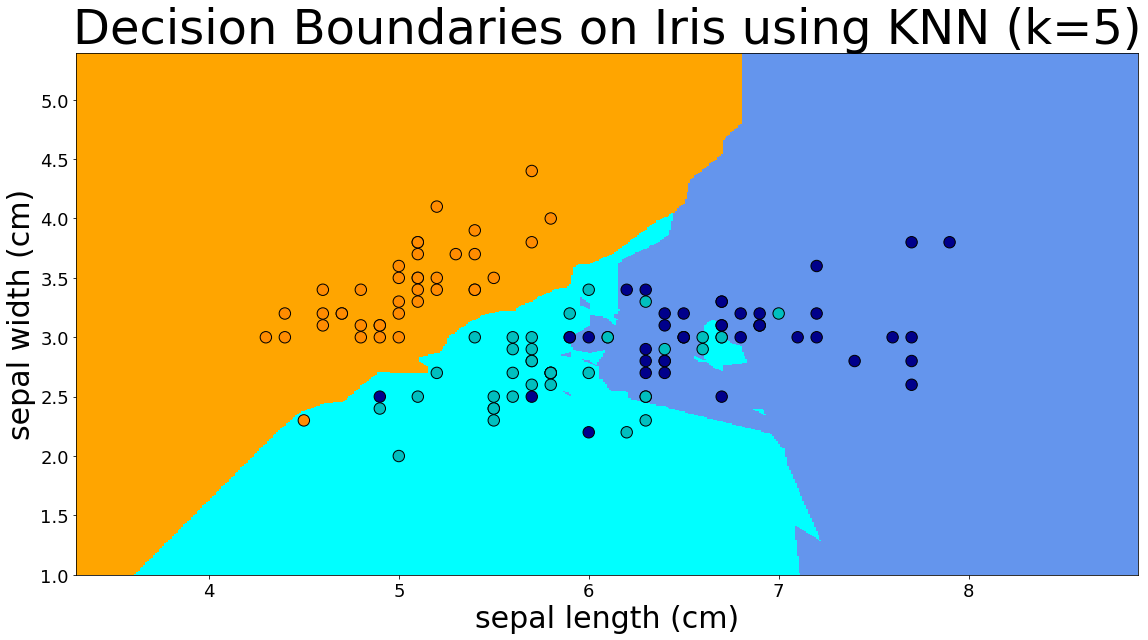

In [18]:
# Define the color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
h = .01  # step size in the mesh

# Create figure and axes with specified size and white background
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), facecolor='white')

# Determine the min and max values for x and y
x_min, x_max = X_train.loc[:, 'sepal length (cm)'].values.min() - 1, X_train.loc[:, 'sepal length (cm)'].values.max() + 1
y_min, y_max = X_train.loc[:, 'sepal width (cm)'].values.min() - 1, X_train.loc[:, 'sepal width (cm)'].values.max() + 1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class using the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='nearest')

# Plot also the training points
ax.scatter(X_train.loc[:, 'sepal length (cm)'].values,
           X_train.loc[:, 'sepal width (cm)'].values,
           c=y_train,
           cmap=cmap_bold,
           edgecolor='k',
           s=130)

# Set the limits of the plot
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

ax.tick_params(labelsize = 18)

ax.set_xlabel('sepal length (cm)', fontsize = 30)
ax.set_ylabel('sepal width (cm)', fontsize = 30)
ax.set_title("Decision Boundaries on Iris using KNN (k=5)", fontsize = 48)

fig.tight_layout()
#fig.savefig('KNN_3_Class_Classification.png', dpi = 950)

### Tuning k
When k is low, KNN is considered a low bias, high variance model. 

When k is high, KNN is considered a high bias, low variance model. 

In the video, as K is increased, the classification spaces' borders become more distinct. 

In [19]:
# Source not clear for this video
# Maybe machinelearningknowledge?
Video("images/KNNlowtoHigh.mp4")

In [20]:
# Code that generated the images for the video

"""
for num_neighbors in range(1, 51):

    # Make an instance of the Model
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)

    # Train the model on the data
    knn.fit(X_train, y_train)

    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    h = .005  # step size in the mesh


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train.loc[:, 'sepal length (cm)'].values.min() - 1, X_train.loc[:, 'sepal length (cm)'].values.max() + 1
    y_min, y_max = X_train.loc[:, 'sepal width (cm)'].values.min() - 1, X_train.loc[:, 'sepal width (cm)'].values.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light )

    # Plot also the training points
    plt.scatter(X_train.loc[:, 'sepal length (cm)'].values,
                X_train.loc[:, 'sepal width (cm)'].values,
                c=y_train,
                cmap=cmap_bold,
                edgecolor='k',
                s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("3-Class classification k = " + str(num_neighbors), fontsize = 15)
    plt.savefig('imagesanimation/' + 'initial' + str(num_neighbors).zfill(4) + '.png', dpi = 5000)
    plt.cla()
"""


'\nfor num_neighbors in range(1, 51):\n\n    # Make an instance of the Model\n    knn = KNeighborsClassifier(n_neighbors=num_neighbors)\n\n    # Train the model on the data\n    knn.fit(X_train, y_train)\n\n    cmap_light = ListedColormap([\'orange\', \'cyan\', \'cornflowerblue\'])\n    cmap_bold = ListedColormap([\'darkorange\', \'c\', \'darkblue\'])\n    h = .005  # step size in the mesh\n\n\n    # Plot the decision boundary. For that, we will assign a color to each\n    # point in the mesh [x_min, x_max]x[y_min, y_max].\n    x_min, x_max = X_train.loc[:, \'sepal length (cm)\'].values.min() - 1, X_train.loc[:, \'sepal length (cm)\'].values.max() + 1\n    y_min, y_max = X_train.loc[:, \'sepal width (cm)\'].values.min() - 1, X_train.loc[:, \'sepal width (cm)\'].values.max() + 1\n\n    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),\n                         np.arange(y_min, y_max, h))\n\n    \n    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])\n\n    # Put the result into a color plot

In [21]:
# ignore. this turns the images into a video
#!ffmpeg -framerate 1 -i 'initial%04d.png' -c:v libx264 -r 30 -pix_fmt yuv420p initial_002.mp4

## Benefits of Pipelines
Pipelines are a simply way to keep your data processing and modeling code organized. Specifically a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

* Cleaner Code: You don’t need to keep track of your training data at each step of processing. Accounting for data at each step of processing can get messy. 
* Fewer Bugs: There are fewer opportunities to mis-apply a step or forget a pre-processing step
* More options for model testing


### Arrange Data into Features Matrix and Target Vector

In [22]:
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

### Split the data into training and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0,
                                                    test_size = .2)

### KNN in `scikit-learn`

In [24]:
# Reduce dimension to 2 with PCA
std_clf = make_pipeline(StandardScaler(),
                        PCA(n_components=2, random_state=0),
                        KNeighborsClassifier(n_neighbors=5))

In [25]:
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [26]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
93.33%



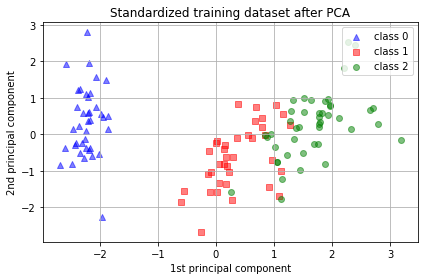

In [27]:
# Extract PCA from pipeline
pca_std = std_clf.named_steps['pca']

# Use PCA with scale on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized  with PCA performed
for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    plt.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

plt.title('Standardized training dataset after PCA')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.legend(loc='upper right')
plt.grid()

plt.tight_layout()